# Step - 1 Main aim
Our main aim is to train a model which can accurately predict the quality of wine and give quality review in the range between 1 to 10.

# Step - 2 Gathering the Data
We will be using the publicly available dataset on kaggle: https://www.kaggle.com/datasets/boiniabhiram/wine-quality-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("WineQuality.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5.000000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5.000000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5.000000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6.000000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1694,7.801551,0.774154,0.241745,2.715859,0.079321,16.037881,10.405468,0.994029,3.557283,0.514583,9.366488,3.897010
1695,7.207143,0.290908,0.590842,3.962575,0.055079,39.435754,78.763287,0.996134,2.925239,1.046480,8.942161,4.307249
1696,10.100031,0.964682,0.540634,3.333877,0.115459,24.801783,71.432995,0.997277,3.327200,0.647539,9.619507,5.409358
1697,5.372036,0.510212,0.078397,0.982824,0.095933,30.435484,76.676115,0.993783,3.158328,0.817616,9.375978,5.454616


In [3]:
df.isnull().sum() # No null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000
mean,8.329397,0.526786,0.271403,2.549096,0.087544,16.048253,46.897874,0.996747,3.311263,0.657206,10.421607,5.638028
std,1.726301,0.178695,0.194009,1.399910,0.046900,10.490591,32.733365,0.001887,0.154309,0.169189,1.066080,0.809308
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.094784,1.900000,0.070000,8.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.091000,22.000000,63.000000,0.997860,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [6]:
df.tail() # Data is not rounded up properly in the last few columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1694,7.801551,0.774154,0.241745,2.715859,0.079321,16.037881,10.405468,0.994029,3.557283,0.514583,9.366488,3.897010
1695,7.207143,0.290908,0.590842,3.962575,0.055079,39.435754,78.763287,0.996134,2.925239,1.046480,8.942161,4.307249
1696,10.100031,0.964682,0.540634,3.333877,0.115459,24.801783,71.432995,0.997277,3.327200,0.647539,9.619507,5.409358
1697,5.372036,0.510212,0.078397,0.982824,0.095933,30.435484,76.676115,0.993783,3.158328,0.817616,9.375978,5.454616
1698,9.277331,0.354429,0.291503,0.900000,0.059163,19.219891,6.000000,0.997578,3.308081,0.751800,10.661601,6.737661


<Figure size 1200x1000 with 0 Axes>

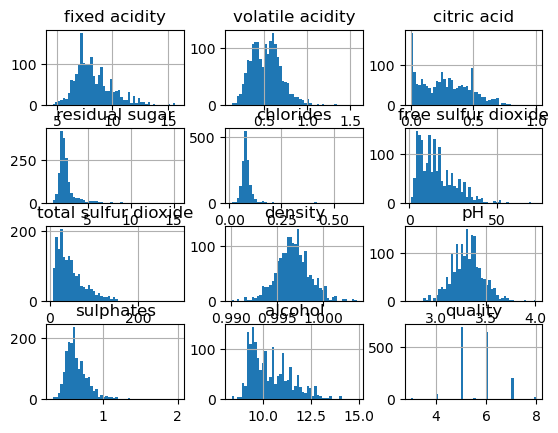

In [7]:
plt.figure(figsize=(12, 10))
df.hist(bins=50)
plt.show()

# Step - 4 Data preprocessing

In [8]:
from sklearn.model_selection import train_test_split

# For future Reference
train_test_split splits the data in the proportion you specify only difference between using this and stratified shuffle split is that in sss we could make the features and labels after we have applied it on the dataset but in this we have to specify the features and labels first then apply it [x_train = train_set(features) y_train = train_set(labels)] & [x_test = test_set(features) y_test = test_set(labels)]

In [9]:
features = df.drop("quality", axis=1)
labels = df["quality"].copy()
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Step - 5 Model Training

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_predicts = lin_reg.predict(x_test)

dec_reg = DecisionTreeRegressor()
dec_reg.fit(x_train, y_train)
dec_predicts = dec_reg.predict(x_test)

forest = RandomForestRegressor()
forest.fit(x_train, y_train)
forest_predicts = forest.predict(x_test)

In [12]:
from sklearn.metrics import root_mean_squared_error

In [13]:
lin_rmse = root_mean_squared_error(y_test, lin_predicts)
dec_rmse = root_mean_squared_error(y_test, dec_predicts)
forest_rmse = root_mean_squared_error(y_test, forest_predicts)

print("Root mean squared error of linear reg is:", lin_rmse)
print("Root mean squared error of decision tree reg is:", dec_rmse)
print("Root mean squared error of Random forest reg is:", forest_rmse)

Root mean squared error of linear reg is: 0.6630775530354487
Root mean squared error of decision tree reg is: 0.8199563797126731
Root mean squared error of Random forest reg is: 0.5947218717376209


In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
lin_rmses = -cross_val_score(lin_reg, x_train, y_train, scoring="neg_root_mean_squared_error", cv=10) 
dec_rmses = -cross_val_score(dec_reg, x_train, y_train, scoring="neg_root_mean_squared_error", cv=10) 
forest_rmses = -cross_val_score(forest, x_train, y_train, scoring="neg_root_mean_squared_error", cv=10)

print("The cross val score for Linear Regression model is:")
print(pd.Series(lin_rmses).describe())
print("The cross val score for Decision Tree Regression model is:")
print(pd.Series(dec_rmses).describe())
print("The cross val score for Random Forest Regression model is:")
print(pd.Series(forest_rmses).describe())

The cross val score for Linear Regression model is:
count    10.000000
mean      0.666825
std       0.060735
min       0.521182
25%       0.653496
50%       0.669376
75%       0.699107
max       0.749944
dtype: float64
The cross val score for Decision Tree Regression model is:
count    10.000000
mean      0.826479
std       0.073567
min       0.734229
25%       0.782985
50%       0.816835
75%       0.859883
max       0.967052
dtype: float64
The cross val score for Random Forest Regression model is:
count    10.000000
mean      0.599138
std       0.057707
min       0.491194
25%       0.574514
50%       0.591575
75%       0.621903
max       0.704984
dtype: float64


Because Decision Tree regressor has the highest mean we will go with that

# Step - 6 Showing results

In [16]:
result_df = pd.read_csv("predictions.csv")
result_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predicted_quality,actual_quality
0,11.3,0.370,0.41,2.30,0.088,6.0,16.0,0.99880,3.09,0.80,9.3,5.000000,5.0
1,9.4,0.400,0.31,2.20,0.090,13.0,62.0,0.99660,3.07,0.63,10.5,6.489722,6.0
2,8.4,0.745,0.11,1.90,0.090,16.0,63.0,0.99650,3.19,0.82,9.6,5.000000,5.0
3,9.1,0.795,0.00,2.60,0.096,11.0,26.0,0.99940,3.35,0.83,9.4,6.000000,6.0
4,7.7,0.965,0.10,2.10,0.112,11.0,22.0,0.99630,3.26,0.50,9.5,5.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,7.2,0.390,0.32,1.80,0.065,34.0,60.0,0.99714,3.46,0.78,9.9,5.000000,5.0
336,9.1,0.450,0.35,2.40,0.080,23.0,78.0,0.99870,3.38,0.62,9.5,5.000000,5.0
337,10.6,0.480,0.64,2.20,0.111,6.0,20.0,0.99700,3.26,0.66,11.7,6.000000,6.0
338,6.6,0.580,0.02,2.40,0.069,19.0,40.0,0.99387,3.38,0.66,12.6,6.000000,6.0


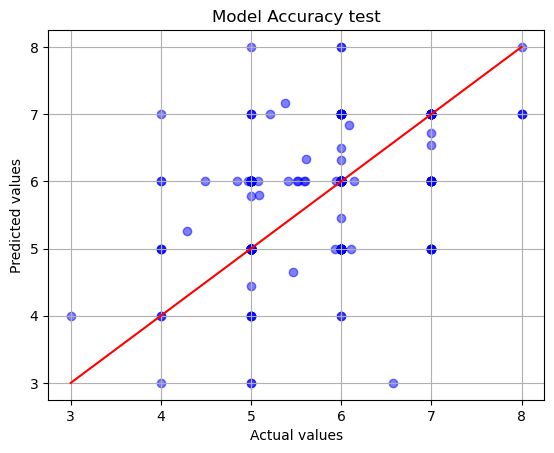

In [17]:
predictions = result_df["predicted_quality"]
actual_values = result_df["actual_quality"]

plt.scatter(actual_values, predictions, color="blue", alpha=0.5)

line = np.linspace(actual_values.min(), actual_values.max(), 100)
plt.plot(line, line, color="red")
plt.grid(True)
plt.title("Model Accuracy test")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.savefig("Accuracy.jpg")
plt.show()